## Dataset


In [16]:
import numpy as np


np.random.seed(42)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [18]:
x, y = make_blobs(n_samples=100, centers=1, n_features=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
def dataset_stats(x: np.ndarray) -> None:
    print(f"Min: {np.min(x, axis=0)}")
    print(f"Max: {np.max(x, axis=0)}")
    print(f"Mean: {np.mean(x, axis=0)}")
    print(f"Std: {np.std(x, axis=0)}")

In [20]:
def plot_dist(x: np.ndarray) -> None:
    sns.jointplot(x=x[:, 0], y=x[:, 1])
    plt.show()

In [21]:
dataset_stats(x_train)

Min: [-5.12894273  7.02671721]
Max: [-0.64342311 11.73445529]
Mean: [-2.64201209  9.04633803]
Std: [0.82256171 0.99101696]


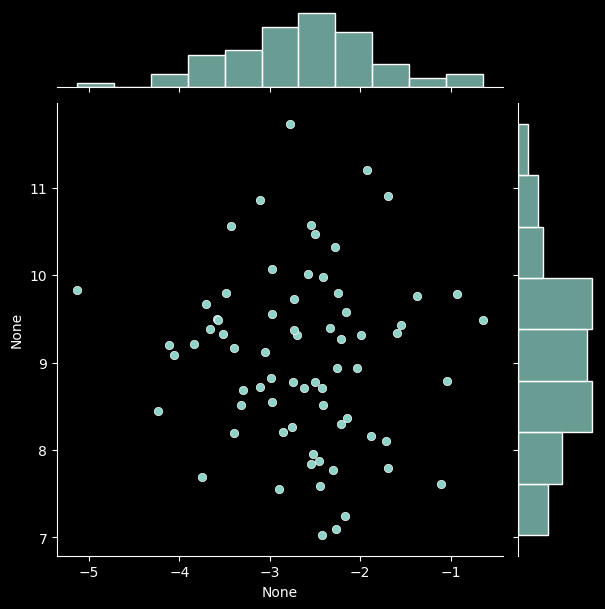

In [22]:
plot_dist(x_train)

## MinMax Scaler


In [23]:
class MinMaxScaler:
    def __init__(self) -> None:
        self.data_min: np.ndarray | None = None
        self.data_max: np.ndarray | None = None

    def fit(self, x: np.ndarray) -> None:
        self.data_min = np.min(x, axis=0)
        self.data_max = np.max(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        return (x - self.data_min) / (self.data_max - self.data_min)

In [24]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)

In [25]:
dataset_stats(x_train_transformed)

Min: [0. 0.]
Max: [1. 1.]
Mean: [0.55443535 0.42900025]
Std: [0.18338159 0.21050809]


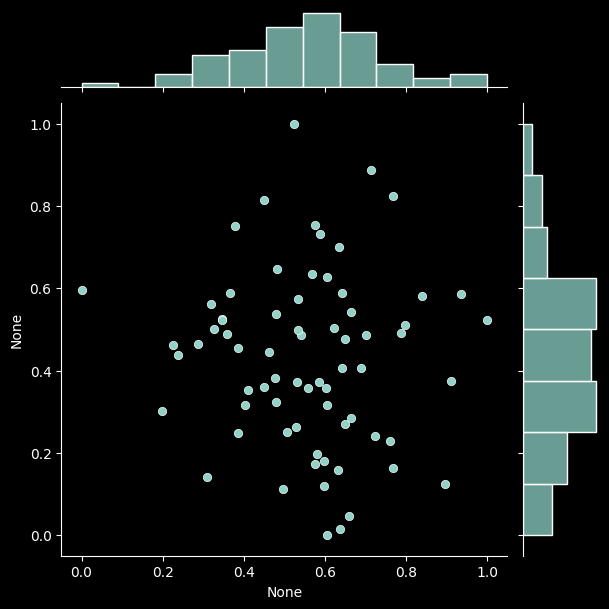

In [26]:
plot_dist(x_train_transformed)

## Standard Scaler


In [27]:
class StandardScaler:
    def __init__(self) -> None:
        self.mean_: np.ndarray | None = None
        self.scale_: np.ndarray | None = None

    def fit(self, x: np.ndarray) -> None:
        self.mean_ = np.mean(x, axis=0)
        self.scale_ = np.std(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        return (x - self.mean_) / self.scale_

In [28]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)

In [29]:
dataset_stats(x_train_transformed)

Min: [-3.02339704 -2.03792761]
Max: [2.42971313 2.71248361]
Mean: [ 2.71211625e-16 -1.64788818e-15]
Std: [1. 1.]


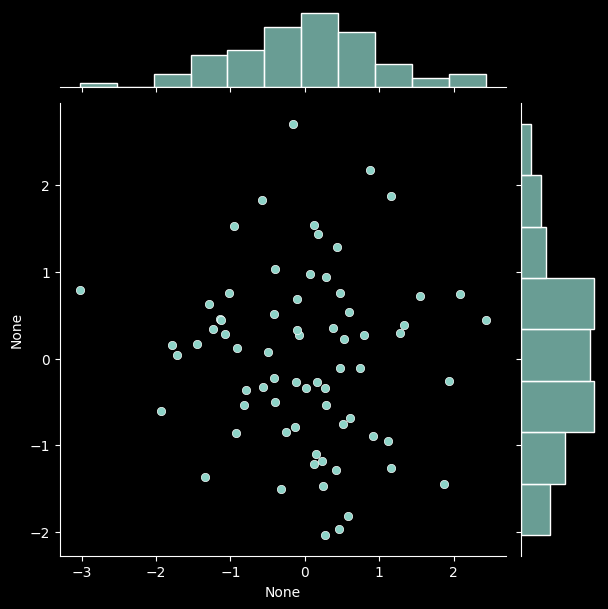

In [30]:
plot_dist(x_train_transformed)